# Problem 32

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [12]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3',  8.0, 6.0)
mdl.node('4', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.truss('d', n['2'], n['4'])

mdl.hinge(e['a'], n['2'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['4'], ['y'])

mdl.numDOF()

[[9, 10, 11], [1, 2, 3], [4, 5, 6], [7, 12, 8]]

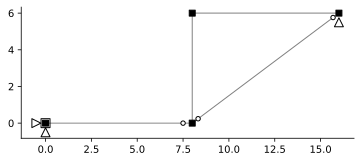

In [13]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [20]:
e['a'].e0['2'] = 1e-3
e['b'].e0['2'] = 1e-3
e['c'].e0['2'] = -1e-3
e['d'].e0['1'] = -4.8e-3/10

In [5]:
V0 = em.V0_vector(mdl)
A = em.A_matrix(mdl)
V0

,$V_{{fff}}$
$a_1$,0.000
$a_2$,-0.004
$a_3$,0.004
$b_1$,0.000
$b_2$,-0.003
$b_3$,0.003
$c_1$,0.000
$c_2$,0.004
$c_3$,-0.004
$d_1$,-4.800


In [6]:
# A.c.inv@V0.c

LinAlgError: Last 2 dimensions of the array must be square

## Displacement Method


In [21]:
Uf = em.analysis.SolveDispl(mdl)
Uf

,$U_{{fffffffffffff}}$
$1$,-0.000000
$2$,0.021333
$3$,-0.004667
$4$,0.010000
$5$,0.021333
$6$,0.001333
$7$,0.010000
$8$,-0.006667


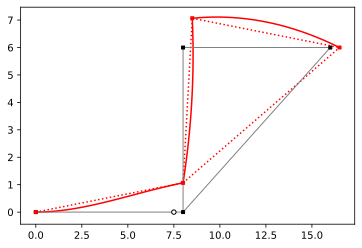

In [22]:
em.plot_U(mdl, Uf, ax, scale=50)